In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import sympy as sym
import warnings
import pickle as plk
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt

## Functions

In [62]:
def f(x):
    return np.cos(2*np.pi*3200*x) + 0.5*np.cos(2*np.pi*600*x) + 0.01*np.cos(2*np.pi*300*x)


def decimation(x,t,M):
    k = M-1
    xnew = []
    tnew = []
    
    for i in range(len(t)):
        k = k + 1
        if(k == M):
            xnew.append(x[i])
            tnew.append(t[i])
            k = 0
            
    return {'x':xnew,'t':tnew}


def interpolation(x,t,L):
    k = L-1

## Q1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

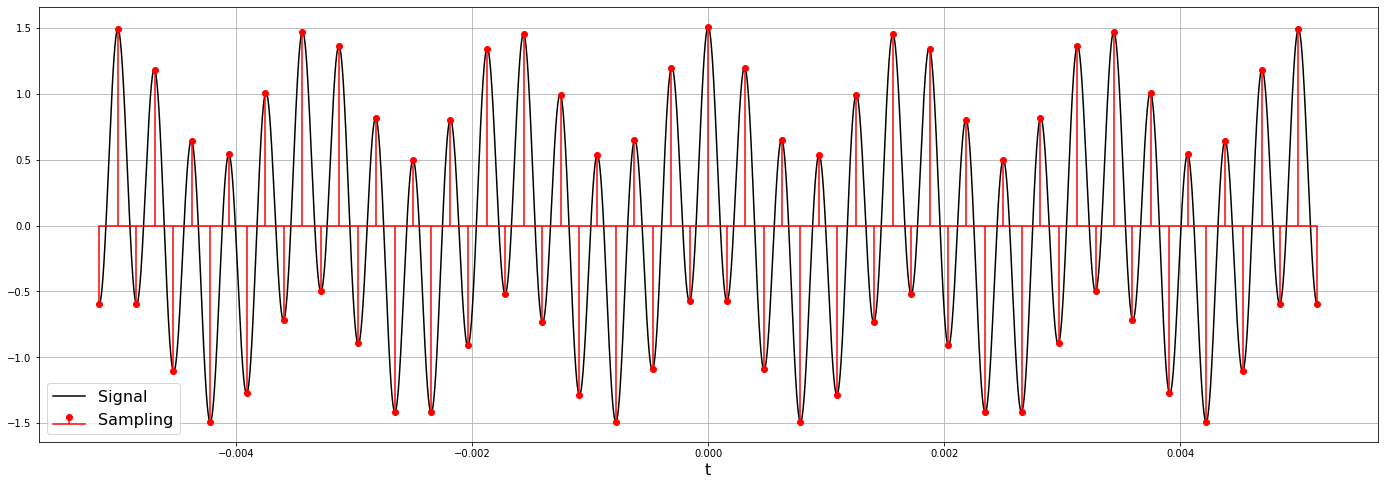

In [100]:
tlimits = [-33/6400,33/6400]

#tpoints = 1000
Fs = 3200*2
tpoints = int(np.floor((tlimits[1]-tlimits[0]) * Fs)) + 1

t1 = np.linspace(tlimits[0],tlimits[1],tpoints)
x1 = f(t1) # Sampled signal

t2 = np.linspace(tlimits[0],tlimits[1],100*tpoints)
x2 = f(t2) # Continuous signal

plt.figure(figsize=(24,8))
plt.grid(True)
plt.plot(t2,x2,'black', label = 'Signal')
markerline, stemline, baseline = plt.stem(t1,x1,'red',label = 'Sampling')
baseline.set_color('red')
markerline.set_color('red')
plt.xlabel("t",fontsize=16)
plt.legend(fontsize=16)

warnings.filterwarnings("ignore")

display(Math('F_{s} = %5.0f, ~~~~~ T_{s} = %5.6f ms' %(Fs, 1e3/Fs)))
display(Math('tPoints = %5.0f, ~~~~~ Time~period = %5.4f ms' %(tpoints,(tlimits[1]-tlimits[0])*1e3)))

## Q2

### Single reconstruction

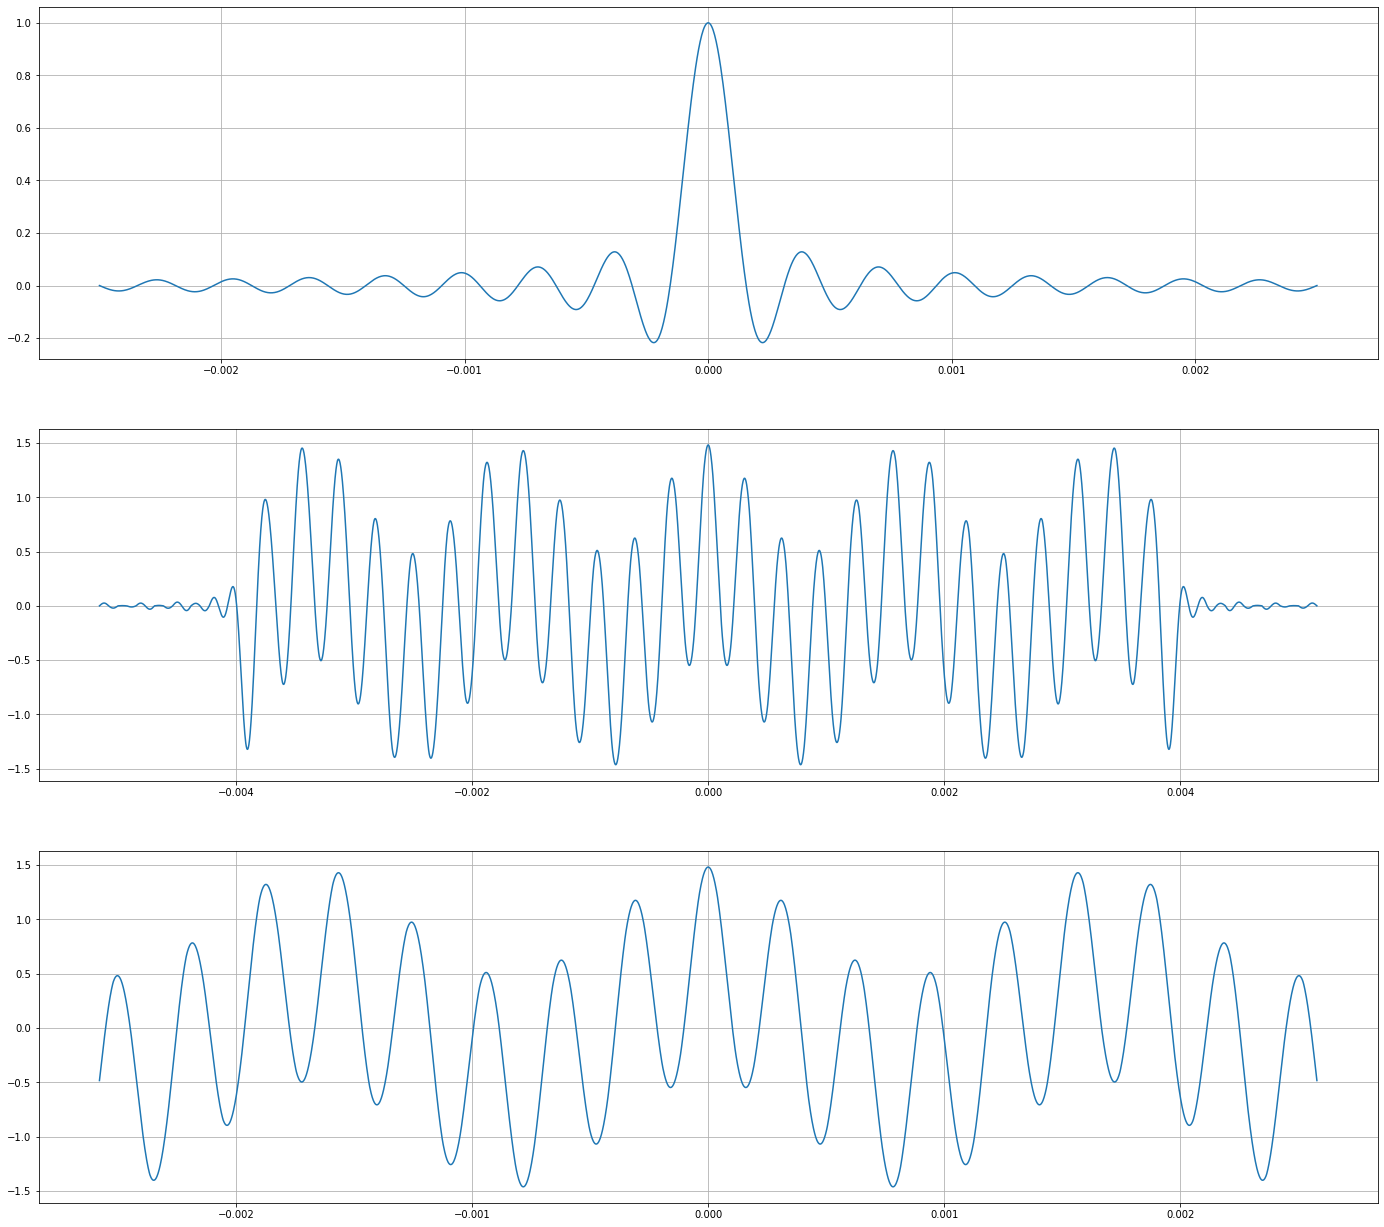

In [78]:
rIncrease = 2 # Range increase
hRange = 16 # Sinc range (in T)
hPoints = 1600 # Sinc points

figure,ax=plt.subplots(3, 1,figsize=(24,22))

increment = int((tlimits[1]-tlimits[0])*(rIncrease/2))
t1inc = np.linspace(tlimits[0]-increment, tlimits[1]+increment, rIncrease*tpoints)
x1inc = f(t1inc) # Sampled signal incremented

th = np.linspace(-hRange*(1/Fs),hRange*(1/Fs),hPoints)
h = np.sin(np.pi*th*Fs)/(np.pi*th*Fs)
ax[0].grid(True)
ax[0].plot(th,h)

totpoints = int(hPoints + (rIncrease*tpoints- 2*hRange - 1)*(hPoints)/(2*hRange))
tr = np.linspace(tlimits[0]-increment, tlimits[1]+increment ,totpoints)
xi = np.zeros(totpoints)
xr = np.zeros(totpoints)

for i in range(rIncrease*tpoints- 2*hRange):
    xi1 = int(i*(hPoints)/(2*hRange))           # Left limit of xi
    xi2 = int(hPoints + i*(hPoints)/(2*hRange)) # Right limit of xi
    #print('xi1={:.2f}, xi2={:.2f}, i={:.2f}, totpoints={:.2f}'.format(xi1,xi2,i,totpoints))
    xi = np.zeros(totpoints)
    xi[xi1:xi2] = x1inc[i+hRange]*h
    xr = xr + xi 

ax[1].grid(True)
ax[1].plot(tr,xr)

dFactor = 2 # Decrement factor
decrement = int(totpoints/2 - totpoints/(2*dFactor))
x3 = xr[decrement : totpoints-decrement]
t3 = tr[decrement : totpoints-decrement]
ax[2].grid(True)
ax[2].plot(t3,x3)

### Reconstruction comparison

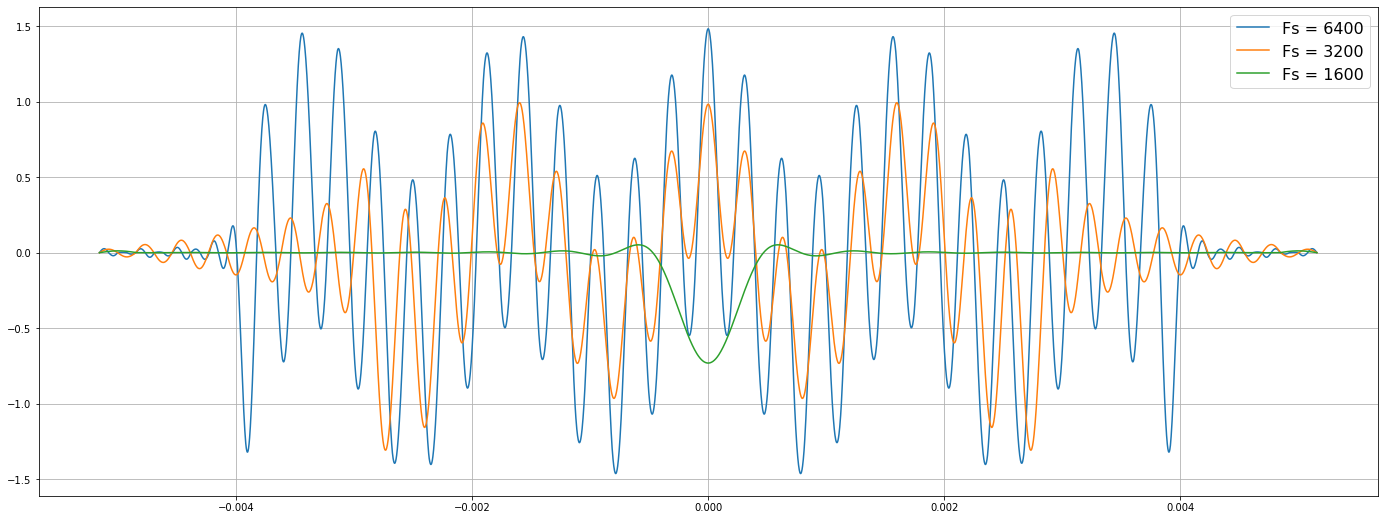

In [79]:
rIncrease = 2 # Range increase
hRange = 16 # Sinc range (in T)
hPoints = 1600 # Sinc points

plt.figure(figsize=(24,9))

for j in range (3):
    Fs = 3200*2 / (2)**j
    tpoints = int(np.floor((tlimits[1]-tlimits[0]) * Fs)) + 1

    increment = int((tlimits[1]-tlimits[0])*(rIncrease/2))
    t1inc = np.linspace(tlimits[0]-increment, tlimits[1]+increment, rIncrease*tpoints)
    x1inc = f(t1inc) # Sampled signal incremented

    th = np.linspace(-hRange*(1/Fs),hRange*(1/Fs),hPoints)
    h = np.sin(np.pi*th*Fs)/(np.pi*th*Fs)

    totpoints = int(hPoints + (rIncrease*tpoints- 2*hRange - 1)*(hPoints)/(2*hRange))
    tr = np.linspace(tlimits[0]-increment, tlimits[1]+increment ,totpoints)
    xi = np.zeros(totpoints)
    xr = np.zeros(totpoints)

    for i in range(rIncrease*tpoints- 2*hRange):
        xi1 = int(i*(hPoints)/(2*hRange))           # Left limit of xi
        xi2 = int(hPoints + i*(hPoints)/(2*hRange)) # Right limit of xi
        #print('xi1={:.2f}, xi2={:.2f}, i={:.2f}, totpoints={:.2f}'.format(xi1,xi2,i,totpoints))
        xi = np.zeros(totpoints)
        xi[xi1:xi2] = x1inc[i+hRange]*h
        xr = xr + xi 

    dFactor = 1 # Decrement factor
    decrement = int(totpoints/2 - totpoints/(2*dFactor))
    x3 = xr[decrement : totpoints-decrement]
    t3 = tr[decrement : totpoints-decrement]
    plt.grid(True)
    plt.plot(t3,x3,label='Fs = {:.0f}'.format(Fs))
    plt.legend(fontsize=16)

## Q3

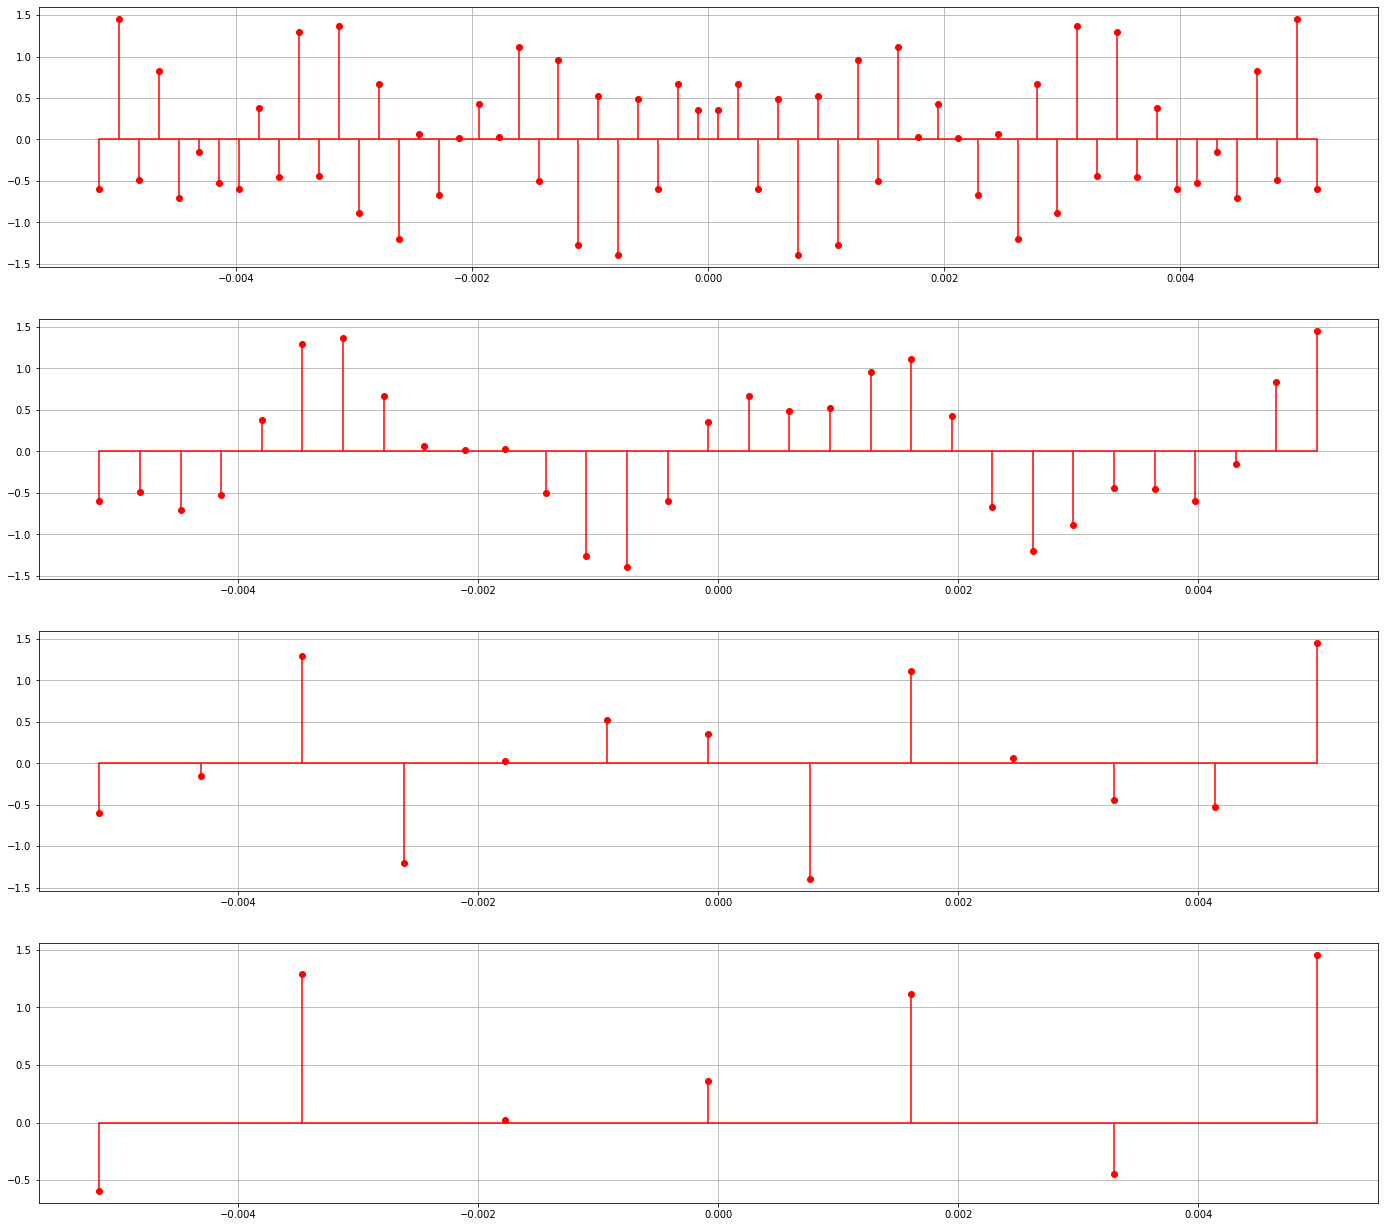

In [64]:
#tpoints = 1000
Fs = 3000*2
tpoints = int(np.floor((tlimits[1]-tlimits[0]) * Fs)) + 1

t1 = np.linspace(tlimits[0],tlimits[1],tpoints)
x1 = f(t1) # Sampled signal

figure,ax = plt.subplots(4, 1,figsize=(24,22))

ax[0].grid(True)
markerline, stemline, baseline = ax[0].stem(t1,x1,'red',label = 'Sampling')
baseline.set_color('red')
markerline.set_color('red')

dec_factors = [2,5,10]
for i in range(len(dec_factors)):
    decimate = decimation(list(x1),list(t1),dec_factors[i])
    dx1 = decimate['x']
    dt1 = decimate['t']

    ax[i+1].grid(True)
    markerline, stemline, baseline = ax[i+1].stem(dt1,dx1,'red',label = 'Sampling')
    baseline.set_color('red')
    markerline.set_color('red')

warnings.filterwarnings("ignore")

[    0.            95.52238806   191.04477612   286.56716418
   382.08955224   477.6119403    573.13432836   668.65671642
   764.17910448   859.70149254   955.2238806   1050.74626866
  1146.26865672  1241.79104478  1337.31343284  1432.8358209
  1528.35820896  1623.88059701  1719.40298507  1814.92537313
  1910.44776119  2005.97014925  2101.49253731  2197.01492537
  2292.53731343  2388.05970149  2483.58208955  2579.10447761
  2674.62686567  2770.14925373  2865.67164179  2961.19402985
  3056.71641791  3152.23880597 -3152.23880597 -3056.71641791
 -2961.19402985 -2865.67164179 -2770.14925373 -2674.62686567
 -2579.10447761 -2483.58208955 -2388.05970149 -2292.53731343
 -2197.01492537 -2101.49253731 -2005.97014925 -1910.44776119
 -1814.92537313 -1719.40298507 -1623.88059701 -1528.35820896
 -1432.8358209  -1337.31343284 -1241.79104478 -1146.26865672
 -1050.74626866  -955.2238806   -859.70149254  -764.17910448
  -668.65671642  -573.13432836  -477.6119403   -382.08955224
  -286.56716418  -191.044

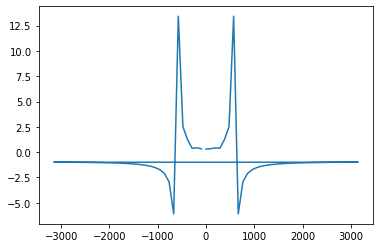

In [108]:
X = np.fft.fft(x1)
Xf = np.fft.fftfreq(np.size(x1),1/Fs)
print(Xf)
plt.plot(Xf,X)
